In [1]:
import numpy as np
from scipy.stats import norm, gamma
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn settings
sns.set_theme()
sns.set_context("poster", font_scale=1.4)

from mcmc import metropolis_hastings

%matplotlib inline

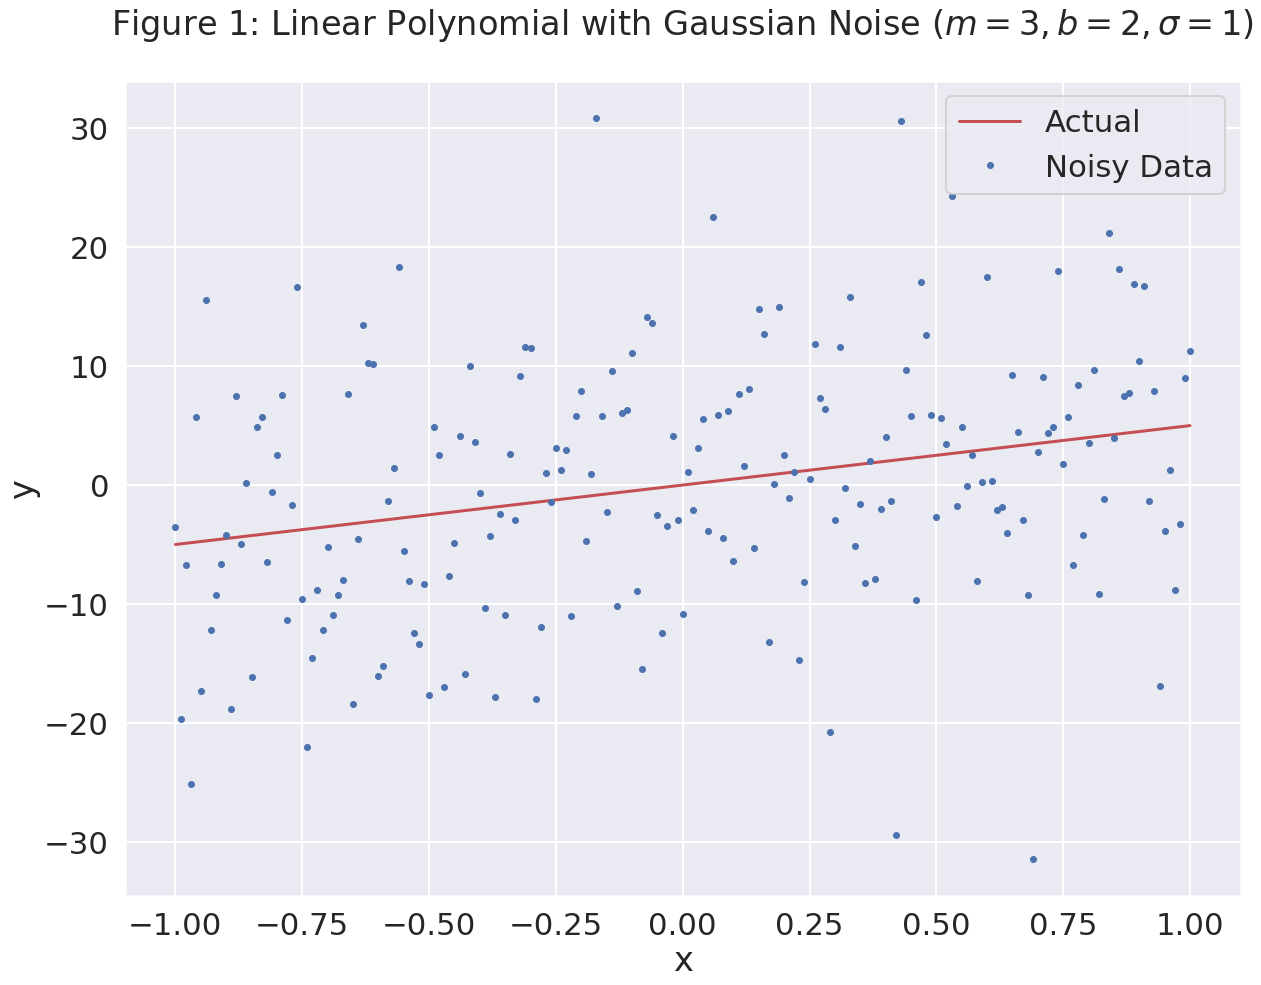

In [20]:
# y = m * x + b
m = 5
b = 0
sigma = 10

def linear_poly(x, m, b):
    
    return m * x + b

def linear_poly_guassian_noise(x, m, b, sigma):
    
    return m * x + b + np.random.normal(0, sigma, x.shape)

step = 1e-2
x = np.arange(-1, 1+step, step)
y_actual = linear_poly(x, m, b)
y_noise = linear_poly_guassian_noise(x, m, b, sigma)

fig, ax = plt.subplots(figsize=(20,15))
ax.plot(x, y_actual, 'r', label='Actual')
ax.plot(x, y_noise, 'b.', label='Noisy Data')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Figure 1: Linear Polynomial with Gaussian Noise ($m = 3, b = 2, \sigma = 1$)\n")
ax.legend()
plt.show()

In [21]:
def gaussian_proposal(x, sigma):
    
    return np.random.normal(x, sigma, x.shape)

def prior(x):
    
    prior_m = np.log(1 / 10)
    prior_b = -np.log(0.5 * np.sqrt(2*np.pi)) - (x[1]**2) / (2*0.5**2)
    prior_s = np.log(1 / 30)
    
    return np.exp(prior_m + prior_b + prior_s)

def log_likelihood(x, data):
    # x[0] = m, x[1] = b, x[2] = sigma
    # data: data[:,0] = x values, data[:,1] = y values
    
    m = x[0]
    b = x[1]
    sigma = x[2]
    
    pred = data[:,0] * m + b
    likelihoods = -np.log(sigma * np.sqrt(2*np.pi)) - ((data[:,1]-pred)**2) / (2*sigma**2)
    
    return np.sum(likelihoods)

In [22]:
data = np.array(list(zip(x, y_noise)))

In [23]:
x_init = np.array([5, 5, 1])
accepted, rejected = metropolis_hastings(x_init, gaussian_proposal, prior, log_likelihood, data, 
                                         proposal_kwargs={'sigma': [0.1, 0.5, 0.3]}, samples=10000, burn_in=0.0)

In [24]:
accepted.shape

(5797, 3)

In [25]:
accepted[-10:, 0], accepted[-10:, 1], accepted[-10:, 2]

(array([5.46611757, 5.58025699, 5.46121972, 5.38753384, 5.40240554,
        5.41715223, 5.47164161, 5.49326467, 5.4972815 , 5.58133678]),
 array([ 0.35955552, -0.25856621, -0.09208805, -0.63036167, -0.25295142,
        -0.50472638, -0.01866423, -0.1005555 , -0.1809428 , -0.29629034]),
 array([10.41513054, 10.18141852, 10.29574026, 10.14045262, 10.23145903,
         9.92902527,  9.74043176,  9.76135317, 10.10247047, 10.15508246]))

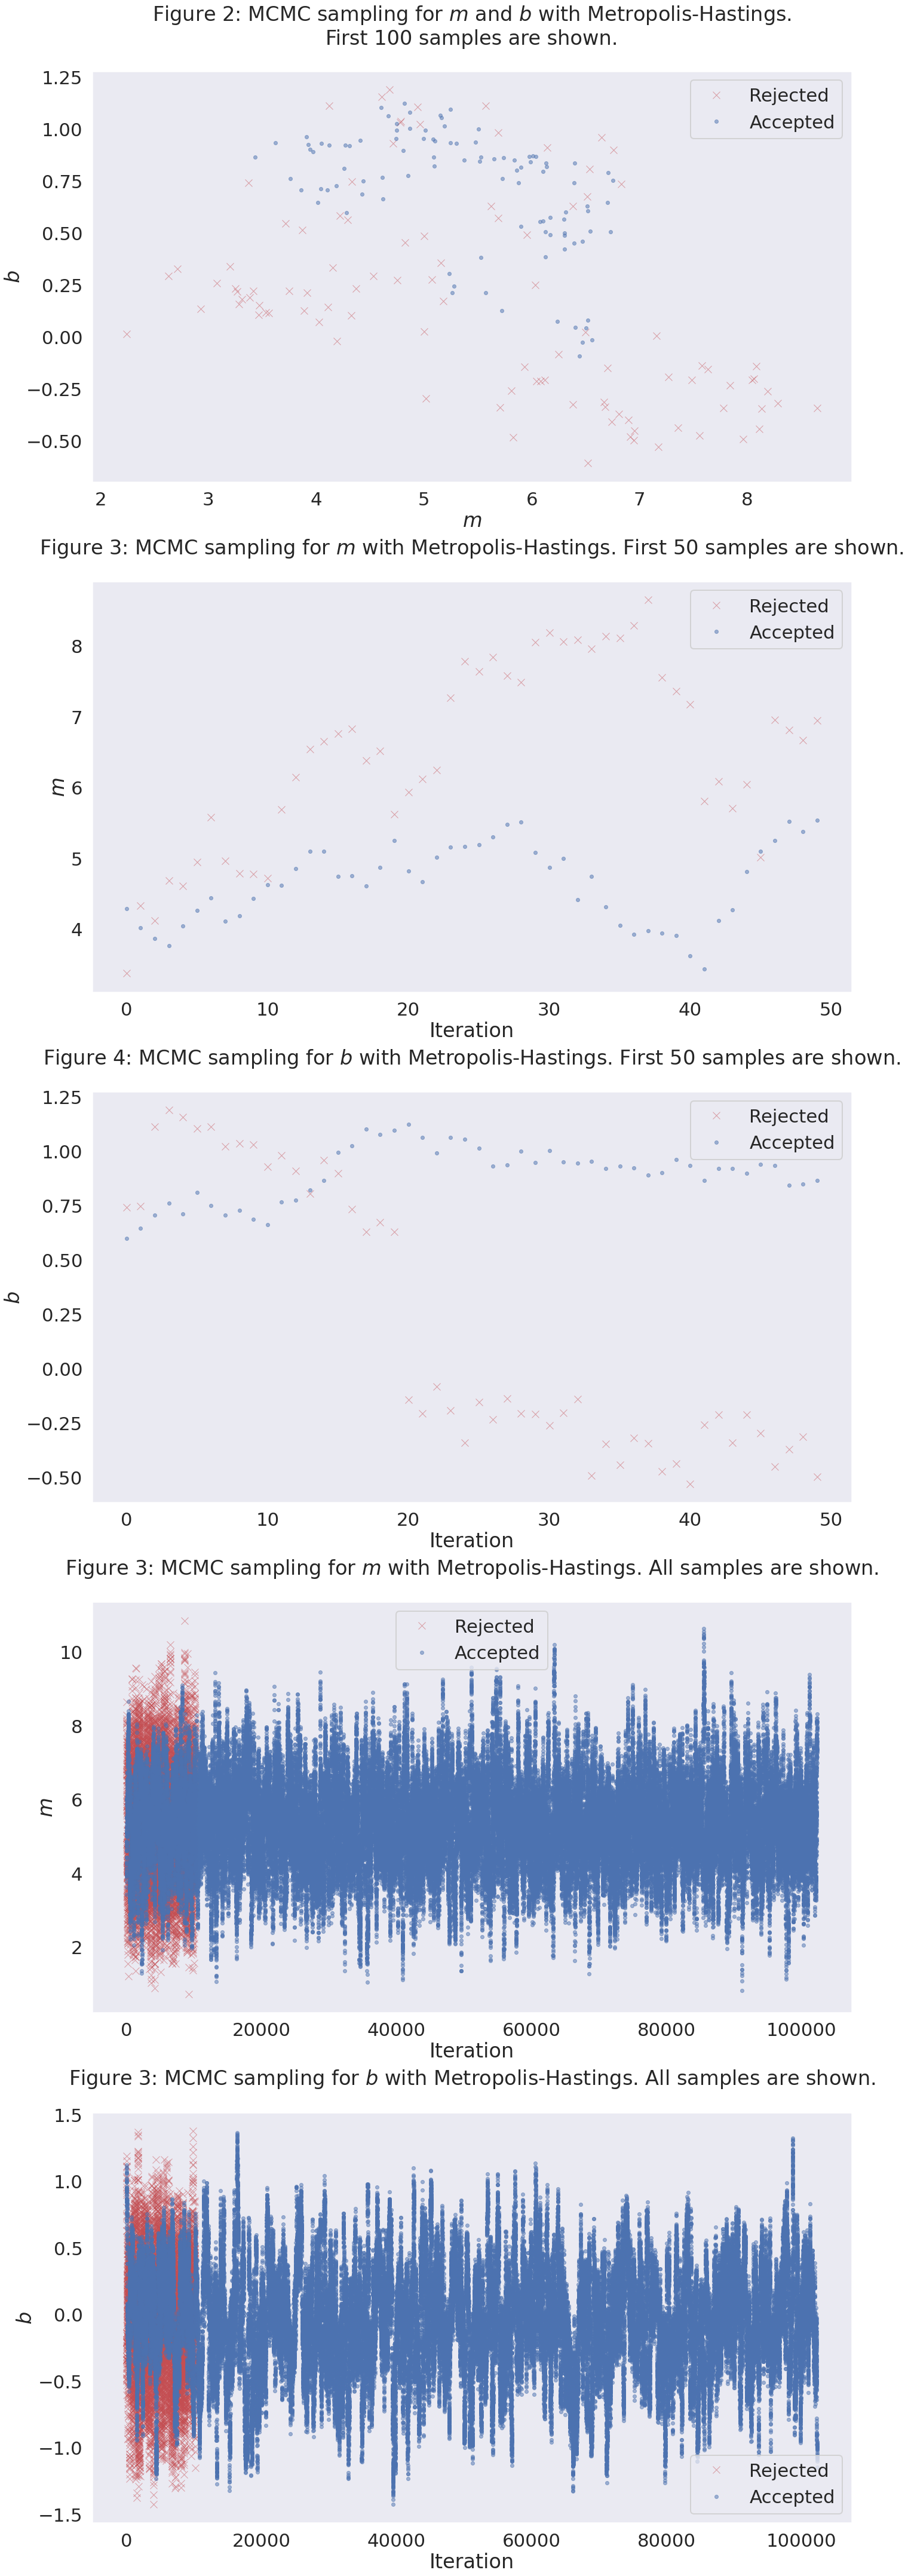

In [32]:
fig = plt.figure(figsize=(20,60))

ax0 = fig.add_subplot(5,1,1)
ax0.plot(rejected[0:100,0],rejected[0:100,1], 'rx', label='Rejected',alpha=0.5)
ax0.plot(accepted[0:100,0],accepted[0:100,1], 'b.', label='Accepted',alpha=0.5)
ax0.set_xlabel("$m$")
ax0.set_ylabel("$b$")
ax0.set_title("Figure 2: MCMC sampling for $m$ and $b$ with Metropolis-Hastings.\nFirst 100 samples are shown.\n")
ax0.grid()
ax0.legend()

ax1 = fig.add_subplot(5,1,2)
ax1.plot(rejected[0:50,0], 'rx', label='Rejected', alpha=0.5)
ax1.plot(accepted[0:50,0], 'b.', label='Accepted', alpha=0.5)
ax1.set_xlabel("Iteration")
ax1.set_ylabel("$m$")
ax1.set_title("Figure 3: MCMC sampling for $m$ with Metropolis-Hastings. First 50 samples are shown.\n")
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(5,1,3)
ax2.plot( rejected[0:50,1], 'rx', label='Rejected',alpha=0.5)
ax2.plot( accepted[0:50,1], 'b.', label='Accepted',alpha=0.5)
ax2.set_xlabel("Iteration")
ax2.set_ylabel("$b$")
ax2.set_title("Figure 4: MCMC sampling for $b$ with Metropolis-Hastings. First 50 samples are shown.\n")
ax2.grid()
ax2.legend()

ax3 = fig.add_subplot(5,1,4)
to_show=-accepted.shape[0]
ax3.plot( rejected[to_show:,0], 'rx', label='Rejected',alpha=0.5)
ax3.plot( accepted[to_show:,0], 'b.', label='Accepted',alpha=0.5)
ax3.set_xlabel("Iteration")
ax3.set_ylabel("$m$")
ax3.set_title("Figure 3: MCMC sampling for $m$ with Metropolis-Hastings. All samples are shown.\n")
ax3.grid()
ax3.legend()

ax4 = fig.add_subplot(5,1,5)
to_show=-accepted.shape[0]
ax4.plot( rejected[to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax4.plot( accepted[to_show:,1], 'b.', label='Accepted',alpha=0.5)
ax4.set_xlabel("Iteration")
ax4.set_ylabel("$b$")
ax4.set_title("Figure 3: MCMC sampling for $b$ with Metropolis-Hastings. All samples are shown.\n")
ax4.grid()
ax4.legend()

fig.tight_layout()
plt.show()

In [27]:
x_init = np.array([5, 5, 5])
accepted, rejected = metropolis_hastings(x_init, gaussian_proposal, prior, log_likelihood, data, 
                                         proposal_kwargs={'sigma': [0.25, 0.05, 0.05]}, samples=150000, burn_in=0.25)

In [28]:
accepted.shape

(102301, 3)

In [29]:
A = np.vstack([x, np.ones(len(x))]).T
m, b = np.linalg.lstsq(A, y_noise, rcond=None)[0]
y_lstsq = linear_poly(x, m, b)

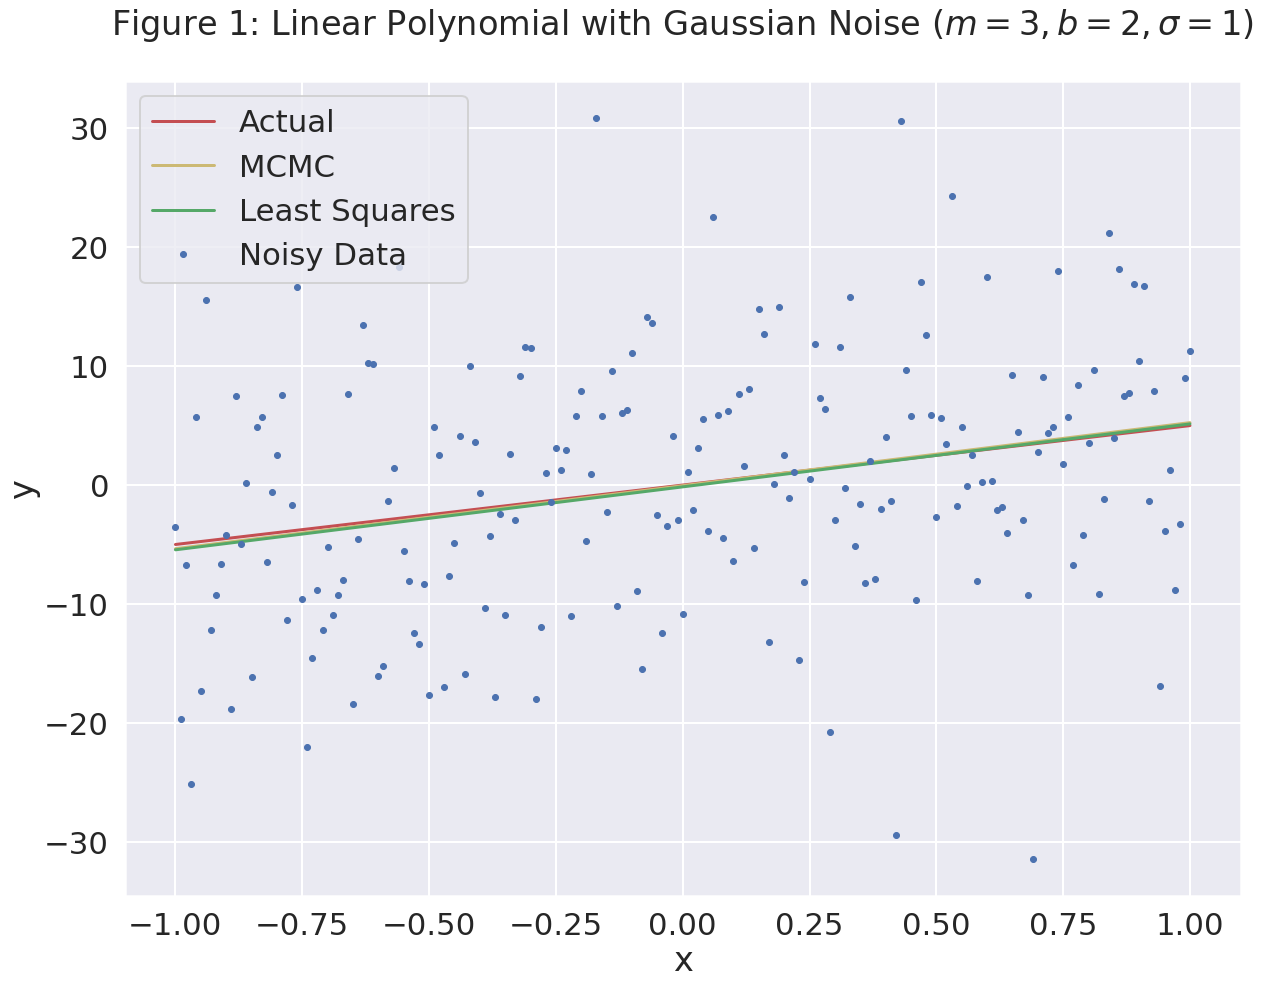

In [30]:
m = np.mean(accepted[:,0])
b = np.mean(accepted[:,1])

y_pred = linear_poly(x, m, b)

fig, ax = plt.subplots(figsize=(20,15))
ax.plot(x, y_actual, 'r', label='Actual')
ax.plot(x, y_pred, 'y', label='MCMC')
ax.plot(x, y_lstsq, 'g', label='Least Squares')
ax.plot(x, y_noise, 'b.', label='Noisy Data')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Figure 1: Linear Polynomial with Gaussian Noise ($m = 3, b = 2, \sigma = 1$)\n")
ax.legend()
plt.show()